# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/2_pytorch_finetune/installation
     
 - Select the right requirements file and run
 
     - cat requirements.txt | xargs -n 1 -L 1 pip install

## Dataset Directory Structure

    Parent_Directory (root)
          |
          |-----------Images (img_dir)
          |              |
          |              |------------------img1.jpg
          |              |------------------img2.jpg
          |              |------------------.........(and so on)
          |
          |
          |-----------train_labels.csv (anno_file)
          
          
## Annotation file format

           | Id         | Labels                                 |
           | img1.jpg   | x1 y1 x2 y2 label1 x1 y1 x2 y2 label2  |
           
- Labels:  xmin ymin xmax ymax label
- xmin, ymin - top left corner of bounding box
- xmax, ymax - bottom right corner of bounding box

# About the Network

1. Blog 1 on Faster RCNN - https://towardsdatascience.com/faster-r-cnn-object-detection-implemented-by-keras-for-custom-data-from-googles-open-images-125f62b9141a

2. Blog 2 on Faster RCNN - https://towardsdatascience.com/review-faster-r-cnn-object-detection-f5685cb30202

3. Paper on Mobilenet V2 - https://arxiv.org/abs/1801.04381

4. Blog 1 on Mobilenet V2 - https://towardsdatascience.com/review-mobilenetv2-light-weight-model-image-classification-8febb490e61c

5. Reference Tutorial - https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html

In [1]:
import os
import sys
sys.path.append("/content/Monk_Object_Detection/2_pytorch_finetune/lib/");

In [2]:
from detector_prototype import Detector

In [3]:
gtf = Detector();

In [4]:
train_root = "../sample_dataset/kangaroo/";                         
train_img_dir = "Images/";                                                     
train_anno_file = "train_labels.csv";

batch_size=1;

In [5]:
gtf.Dataset([train_root, train_img_dir, train_anno_file], batch_size=batch_size);

In [6]:
pretrained = True;         
gpu=True;
model_name = "faster-rcnn_mobilenet-v2";

In [7]:
gtf.Model(model_name, use_pretrained=pretrained, use_gpu=gpu);

In [8]:
gtf.Set_Learning_Rate(0.005);

In [11]:
epochs=2;
params_file = "saved_model.h5";

In [12]:
gtf.Train(epochs, params_file);

Epoch: [0]  [  0/164]  eta: 0:01:10  lr: 0.000036  loss: 0.8413 (0.8413)  loss_classifier: 0.1561 (0.1561)  loss_box_reg: 0.0774 (0.0774)  loss_objectness: 0.5670 (0.5670)  loss_rpn_box_reg: 0.0409 (0.0409)  time: 0.4320  data: 0.1926  max mem: 2526
Epoch: [0]  [ 20/164]  eta: 0:00:35  lr: 0.000649  loss: 0.7821 (0.8180)  loss_classifier: 0.1444 (0.1736)  loss_box_reg: 0.0603 (0.0654)  loss_objectness: 0.5078 (0.5068)  loss_rpn_box_reg: 0.0406 (0.0722)  time: 0.2337  data: 0.0028  max mem: 2557
Epoch: [0]  [ 40/164]  eta: 0:00:29  lr: 0.001261  loss: 0.6030 (0.7446)  loss_classifier: 0.1779 (0.1879)  loss_box_reg: 0.0744 (0.0784)  loss_objectness: 0.3107 (0.4048)  loss_rpn_box_reg: 0.0455 (0.0735)  time: 0.2347  data: 0.0032  max mem: 2567
Epoch: [0]  [ 60/164]  eta: 0:00:24  lr: 0.001874  loss: 0.5096 (0.6912)  loss_classifier: 0.1621 (0.1876)  loss_box_reg: 0.0812 (0.0884)  loss_objectness: 0.1968 (0.3375)  loss_rpn_box_reg: 0.0401 (0.0776)  time: 0.2251  data: 0.0034  max mem: 2567


# Running Inference

In [1]:
import os
import sys
sys.path.append("../../2_pytorch_finetune/lib/");

In [2]:
from inference_prototype import Infer

In [3]:
model_name = "faster-rcnn_mobilenet-v2";
params_file = "saved_model.h5";
class_list = ["kangaroo"];

In [4]:
gtf = Infer(model_name, params_file, class_list, use_gpu=True);

In [5]:
img_name = "../sample_dataset/kangaroo/test/kg4.jpeg"; 
thresh = 0.5;

In [6]:
output = gtf.run(img_name,thresh=thresh);

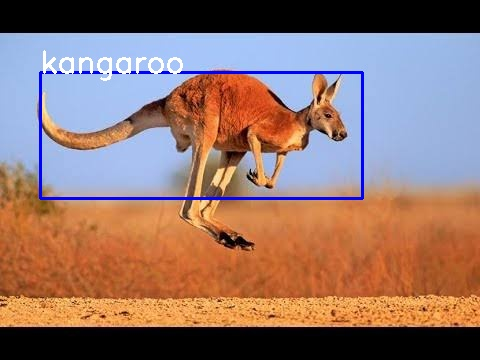

In [7]:
from IPython.display import Image as Im
Im(filename='out.jpg') 

# Author - Tessellate Imaging - https://www.tessellateimaging.com/

# Monk Library - https://github.com/Tessellate-Imaging/monk_v1

    Monk is an opensource low-code tool for computer vision and deep learning


## Monk features
   - low-code
   - unified wrapper over major deep learning framework - keras, pytorch, gluoncv
   - syntax invariant wrapper

## Enables

    - to create, manage and version control deep learning experiments
    - to compare experiments across training metrics
    - to quickly find best hyper-parameters

## At present it only supports transfer learning, but we are working each day to incorporate

    - GUI based custom model creation
    - various object detection and segmentation algorithms
    - deployment pipelines to cloud and local platforms
    - acceleration libraries such as TensorRT
    - preprocessing and post processing libraries


## To contribute to Monk AI or Monk Object Detection repository raise an issue in the git-repo or dm us on linkedin

    - Abhishek - https://www.linkedin.com/in/abhishek-kumar-annamraju/
    - Akash - https://www.linkedin.com/in/akashdeepsingh01/
